In [1]:
# Below code is for displaying all outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Importing packeges and liberaries
import random
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter


import warnings
warnings.filterwarnings('ignore') # to ignore warnings

pd.set_option('display.max_rows', 500) # display 500 rows in output of a cell

# Titanic Dataset

In [21]:
# train dataset
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
train.shape

(891, 12)

In [22]:
# test datset
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_test.csv')
test.shape # one column is less in test dataset because label column is not in the test datset, it's our task to predict labels

(418, 11)

In [4]:
# following code will displat the data types of columns
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.head() # displays the first five rows
train.head(10) # displays the first 10 rows
train.iloc[[0]] # displays the first row
train.iloc[[15]] # displays the 16th row 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,NaN,S


In [6]:
# detect columns with missing valuess in training dataset

train_count_of_missing_values_by_cols = train.isnull().sum() # displays the total number of missing values in each column
train_count_of_missing_values_by_cols

train_count_of_missing_values_by_cols[train_count_of_missing_values_by_cols > 0] # displays only the columns which have missing values

(train_count_of_missing_values_by_cols[train_count_of_missing_values_by_cols > 0] / train.shape[0]) * 100 # displays percentage missing values in missing columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age         177
Cabin       687
Embarked      2
dtype: int64

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [7]:
# detect columns with missing values with test datasets

test_count_of_missing_values_by_cols = test.isnull().sum()
test_count_of_missing_values_by_cols

test_count_of_missing_values_by_cols[test_count_of_missing_values_by_cols > 0] # only columns having missing values

(test_count_of_missing_values_by_cols[test_count_of_missing_values_by_cols > 0] / test.shape[0] ) *100

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [23]:
# describe function takes all numeric columns and provide descriptive analysis of them
train.describe()

# from dtype function and also describe function output we can underdtand there are some
# catagorical features that are treated as numeric that should not be so we have to transform
# in catagorical features

train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)

# Note:1- IndexId is an index columns and it is of no use in our column so it can be converted in index or deleted 
# Note:2- Survived and Pclass variables are catogorical bur treated as numerical while imporing

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
from pandasgui import show
gui = show(train)

In [24]:
# value_counts() reveals the unique number of values along with there frequency in the column. Let's take a look on string columns
# value_counts(normalize=True) expresses ther frequncy propotional to total number of rows (in percentage).

train['Sex'].value_counts()
train['Sex'].value_counts(normalize=True)*100

train['Embarked'].value_counts()
train['Embarked'].value_counts(normalize=True)*100

male      577
female    314
Name: Sex, dtype: int64

male      64.758698
female    35.241302
Name: Sex, dtype: float64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [25]:
# Drop irrelevent columns - Name, Ticket and may be PassengerId (If PassengerId is not used as index column)
del train['Name']
del train['PassengerId']
del train['Ticket']

# Code for using PessengerId as index column
# train = train.set_index('PassengerId')

train.head()
train.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


(891, 9)

In [26]:
# Missing values Treatment
# Missing too many values - dropping the entire column
del train['Cabin']

# Missing values in numeric columns many not be nan or null but It could be zero. For example zero
# value in Fare column is a missing value because Fare can't be zero
# filter Fare == 0 shows the number of rows with zero values in Fare column
train[train['Fare'] == 0].shape

# There are only few zero values in Fare variable - dropping entire row with zero Fare value
train = train[train['Fare'] != 0]

# the shape of the train dataset after dropping rows
train.shape

(15, 8)

(876, 8)

In [27]:
# Importing Simple imputer from Scikit Learn - It'll impute data in the cells with missing values
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

# missing values - categorical - impute with mode (most frequent)
mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

# missing values - categorical - filling with most frequent (mode)
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

# export the data in csv file and check it in Excell to see how the imputer works
train.to_csv('train_data.csv')

SimpleImputer()

SimpleImputer(strategy='most_frequent')

In [28]:
# determine the outliers using standard deviation method for Age column

# calculate the mean of Age column
age_mean = train['Age'].mean()

# calculate the standard deviation of Age column
age_std = train['Age'].std()

# lower limit threshold is mean - 3*std
ll = age_mean - (age_std*3)

# upper limit threshold im mean + 3*std
hh = age_mean + (age_std*3)

# filter the rows where Age is outlier. i.e. Age less than the lower limit or upper than higher limit
filt_outliers_train = train[(train['Age'] < ll) | (train['Age'] > hh)]
filt_outliers_train.head()
filt_outliers_train.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S


(7, 8)

In [29]:
# Determine the outlier by using standard deviation of Fare coulumn

fare_mean = train['Fare'].mean() # mean of Fare column
fare_std = train['Fare'].std() # standard deviation of Fare column

ll = fare_mean - (fare_std*3)
hh = fare_mean + (fare_std*3)

# filter the rows where Fare is outlier
filt_outliers_train = train[(train['Fare'] > hh) | (train['Fare'] < ll)]
filt_outliers_train.head()
filt_outliers_train.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
118,0,1,male,24.0,0,1,247.5208,C
258,1,1,female,35.0,0,0,512.3292,C
299,1,1,female,50.0,0,1,247.5208,C


(20, 8)

(876, 8)

(66, 8)

<AxesSubplot:ylabel='Age'>

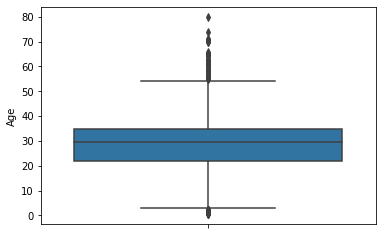

In [30]:
train.shape
# IQR Method for outlier Age
# calculate Q1, Q3 and IQR
q1 = train['Age'].quantile(0.25)
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5

# Apply filter with respect ro IQR, including Whisker_width
outlier_age_train = train[(train['Age'] < q1 - (iqr*whisker_width)) | 
                          (train['Age'] > q3 + (iqr*whisker_width))]
outlier_age_train.shape

# boxplot with 1.5 whisker
sns.boxplot(y='Age', data=train, whis=1.5)

(876, 8)

(116, 8)

<AxesSubplot:ylabel='Fare'>

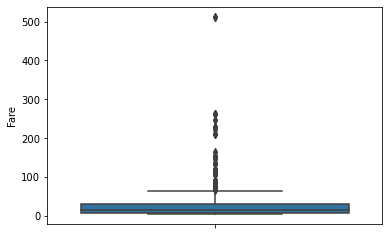

In [36]:
train.shape
# IQR Method for outlier Fare
q1 = train['Fare'].quantile(0.25) # calculating Q1
q3 = train['Fare'].quantile(0.75) # calculation Q3
iqr = q3 - q1 # IQR
whisker_width = 1.5
lower_whisker = q1 - (iqr*whisker_width)
upper_whisker = q3 + (iqr*whisker_width)

# filter the rows of Fare ourliers
outlier_fare_train = train[(train['Fare'] < q1 - (iqr*whisker_width)) | (train['Fare'] > q3 + (iqr*whisker_width))]
outlier_fare_train.shape

# boxplot with 1.5 whisker
sns.boxplot(y='Fare', data=train, whis=1.5)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

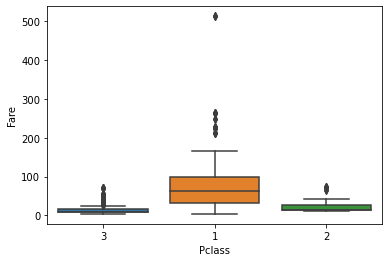

In [37]:
# Multivariate outliers - fare and class in comparison
# sometimes outliers may occur when we compare two columns
# in our titanic dataset - we can check if fare in directly propotional to class
# Are first class people paying more fare than third class? Either is there any overelap in fare of these two classes

# following code displays the fare on y-axis and class on x-axis to display distribution of fare by class
sns.boxplot(y='Fare', x='Pclass', data=train, whis=1.5)

In [39]:
# Out liers Treatment
# Top Cieling - Cieling the upper limit of the column with the ourter whisker
train.loc[train['Fare'] > upper_whisker, 'Fare'] = upper_whisker

# Bottom Cieling/Zero Coding - Cieling the lower limit of the column with lower whisker or zero
# It is called Bottom cieling when you ciel the lowest value with lower whisker
# It is called zero coding when you ciel the lowest value with zero
# Zero coding should be used for variable which can't take negative values. e.g. Age, Fare
train.loc[train.Fare < lower_whisker, 'Fare'] = 0

# display the minimum and maximum after the treatment of outliers
train['Fare'].min()
train['Fare'].max()

4.0125

66.3

In [40]:
# another method for oulier treatment is binning
# Group the values in certain bins. e.g. Age 0 to 10 in a bin called 0-10 etc

# Equal width binning - (max - min)/N
age_range = train['Age'].max() - train['Age'].min()
min_value = int(np.floor(train.Age.min()))
max_value = int(np.ceil(train.Age.max()))


# let's round the bin width
# N = number of bins - which is 10 in the below code
# Change the value 10 in the below code to see how the grouping differs
inter_value = int(np.round(age_range/10))

min_value, max_value, inter_value

(0, 80, 8)

[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]

['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'bin_6',
 'bin_7',
 'bin_8',
 'bin_9',
 'bin_10']

<AxesSubplot:xlabel='age_labels', ylabel='count'>

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_labels,age_interval
0,0,3,male,22.0,1,0,7.250,S,bin_3,"(16.0, 24.0]"
1,1,1,female,38.0,1,0,66.300,C,bin_5,"(32.0, 40.0]"
2,1,3,female,26.0,0,0,7.925,S,bin_4,"(24.0, 32.0]"
3,1,1,female,35.0,1,0,53.100,S,bin_5,"(32.0, 40.0]"
4,0,3,male,35.0,0,0,8.050,S,bin_5,"(32.0, 40.0]"


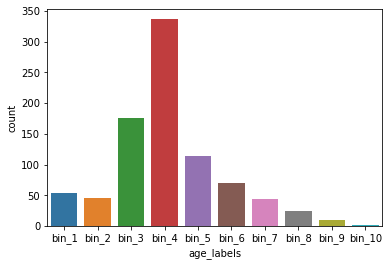

In [46]:
# Calculate the intervals
intervals = [i for i in range(min_value, max_value+1, inter_value)]
labels = ['bin_'+str(i) for i in range(1, len(intervals))]
intervals
labels

train['age_labels'] = pd.cut(x=train.Age, bins=intervals, labels=labels, include_lowest=True)
train['age_interval'] = pd.cut(x=train.Age, bins=intervals, include_lowest=True)

# displays the bins in graph alongwith frequency of occurence
sns.countplot(train.age_labels)
train.head()

# Examples for class Imbalance

In [2]:
# importing the fraud dataset
fraud_data = pd.read_csv("fraud_data.csv")

In [3]:
# take a look at the data
fraud_data.shape
fraud_data.head()

(59054, 434)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dataset is too large, simplyfying dataset
fraud_data = fraud_data.iloc[:2000,]

0    1929
1      71
Name: isFraud, dtype: int64

0    96.45
1     3.55
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

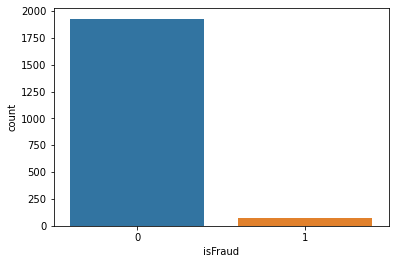

In [5]:
# Taking a look at target variable
# isFraud == 0 --> normal transaction
# isFraud == 1 --> fraudulent transacion

fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True)*100

# visualize the target variable
sns.countplot(fraud_data.isFraud)

# interperating the results - 2.29 transactions are fraud and 96.60 are non-fraudulant

In [6]:
# missing values - To get percentage of missing values
(fraud_data.isnull().sum() / fraud_data.shape[0]) *100

TransactionID      0.00
isFraud            0.00
TransactionDT      0.00
TransactionAmt     0.00
ProductCD          0.00
card1              0.00
card2              1.40
card3              0.30
card4              0.30
card5              0.80
card6              0.30
addr1             12.15
addr2             12.15
dist1             59.65
dist2             93.75
P_emaildomain     15.65
R_emaildomain     76.10
C1                 0.00
C2                 0.00
C3                 0.00
C4                 0.00
C5                 0.00
C6                 0.00
C7                 0.00
C8                 0.00
C9                 0.00
C10                0.00
C11                0.00
C12                0.00
C13                0.00
C14                0.00
D1                 0.25
D2                45.75
D3                42.85
D4                28.10
D5                51.05
D6                86.80
D7                92.70
D8                86.70
D9                86.70
D10               12.45
D11             

In [7]:
# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns

In [8]:
# filling missing values of numerical columns with mean values
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean)

In [9]:
# getting alll the categorical columns
cat_cols = fraud_data.select_dtypes(include='object').columns

# filling missing values of categorical columns with mode
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

In [10]:
# let's have a look if there exists any null value
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
card1             0.0
card2             0.0
card3             0.0
card4             0.0
card5             0.0
card6             0.0
addr1             0.0
addr2             0.0
dist1             0.0
dist2             0.0
P_emaildomain     0.0
R_emaildomain     0.0
C1                0.0
C2                0.0
C3                0.0
C4                0.0
C5                0.0
C6                0.0
C7                0.0
C8                0.0
C9                0.0
C10               0.0
C11               0.0
C12               0.0
C13               0.0
C14               0.0
D1                0.0
D2                0.0
D3                0.0
D4                0.0
D5                0.0
D6                0.0
D7                0.0
D8                0.0
D9                0.0
D10               0.0
D11               0.0
D12               0.0
D13               0.0
D14               0.0
D15       

# One Hot Coding

In [11]:
fraud_data.shape
fraud_data[cat_cols].dtypes
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

fraud_data = pd.get_dummies(fraud_data, columns=cat_cols) # earlear we have
# collected all categorical columns in cat_cols
fraud_data.shape
fraud_data.head()

(2000, 434)

ProductCD        object
card2            object
card3            object
card4            object
card5            object
card6            object
addr1            object
addr2            object
dist1            object
dist2            object
P_emaildomain    object
R_emaildomain    object
D1               object
D2               object
D3               object
D4               object
D5               object
D6               object
D7               object
D8               object
D9               object
D10              object
D11              object
D12              object
D13              object
D14              object
D15              object
M1               object
M2               object
M3               object
M4               object
M5               object
M6               object
M7               object
M8               object
M9               object
V1               object
V2               object
V3               object
V4               object
V5               object
V6              

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed